# Amazon Alexa Review - Sentiment Analysis

 Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.

### Importing required libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Exploratory Data Analysis

In [2]:
#Load the data

data = pd.read_csv(r"E:\NLP Poject\amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [3]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [4]:
data.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [5]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [7]:
#Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
#Getting the record where 'verified_reviews' is null 

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback


In [9]:
#We will drop the null record

data.dropna(inplace=True)

In [10]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3150, 5)


In [11]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [12]:
data.head(11)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1,367
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1,116


In [13]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[15]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[15]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[15]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I love it, wife hates it."
Length of review : 27
'length' column value : 27


We can see that the length of review is the same as the value in the length column for that record

In [14]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

### Analyzing 'rating' column
This column refers to the rating of the variation given by the user

In [15]:
len(data)

3150

In [16]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [17]:
#Distinct values of 'rating' and its count  

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


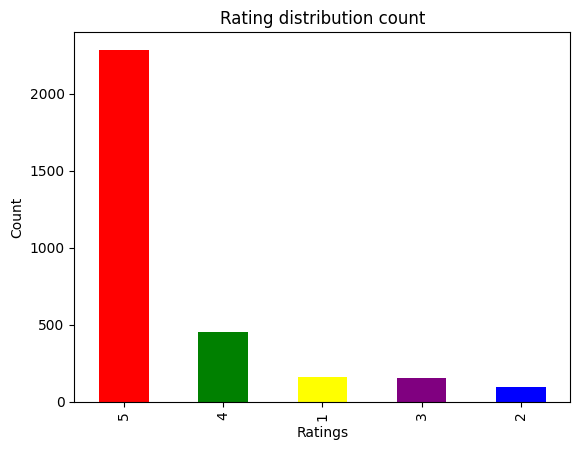

In [18]:
#Bar plot to visualize the total counts of each rating
color=['red','green','yellow','purple','blue']
data['rating'].value_counts().plot.bar(color = color)
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [19]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

5    0.725714
4    0.144444
1    0.051111
3    0.048254
2    0.030476
Name: rating, dtype: float64


<Axes: ylabel='Percentage wise distrubution of rating'>

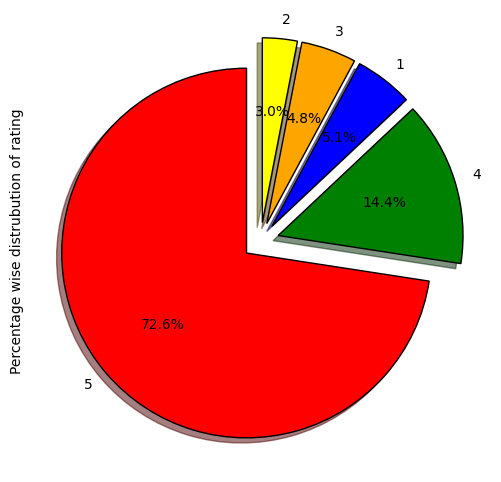

In [37]:

fig = plt.figure(figsize=(6,6))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
print(tags)
explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

In [26]:
data['rating'].value_counts()/data.rating.shape

5    0.725714
4    0.144444
1    0.051111
3    0.048254
2    0.030476
Name: rating, dtype: float64

In [27]:
data.rating.shape

(3150,)

## Analyzing 'feedback' column

This column refers to the feedback of the verified review

In [28]:
#Distinct values of 'feedback' and its count 

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

feedback value = 0

In [33]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[2]['verified_reviews']
print(review_0)

Not much features.


In [36]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[]['verified_reviews']
print(review_1)

Amazing paroduct


From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

Let's plot the feedback value count in a bar graph

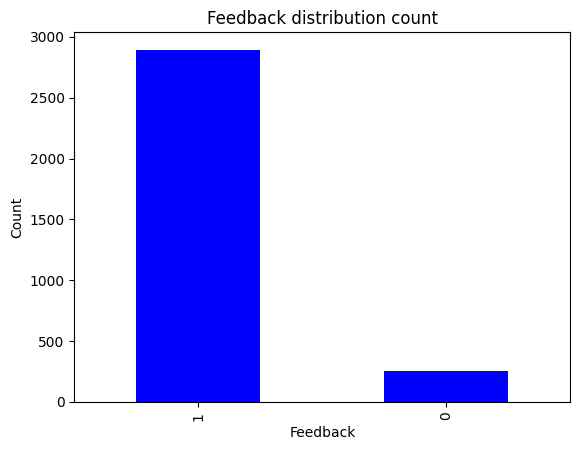

In [39]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [43]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


Feedback distribution

91.87% reviews are positive
8.13% reviews are negative

<Axes: ylabel='Percentage wise distrubution of feedback'>

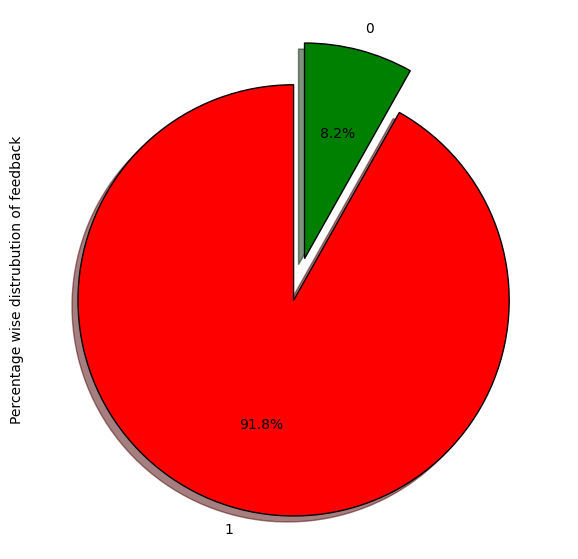

In [45]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

Let's see the 'rating' values for different values of 'feedback'

In [47]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [48]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more ac...",0,165
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0,89
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

## Analyzing 'variation' column

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [54]:
#Distinct values of 'variation' and its count 

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


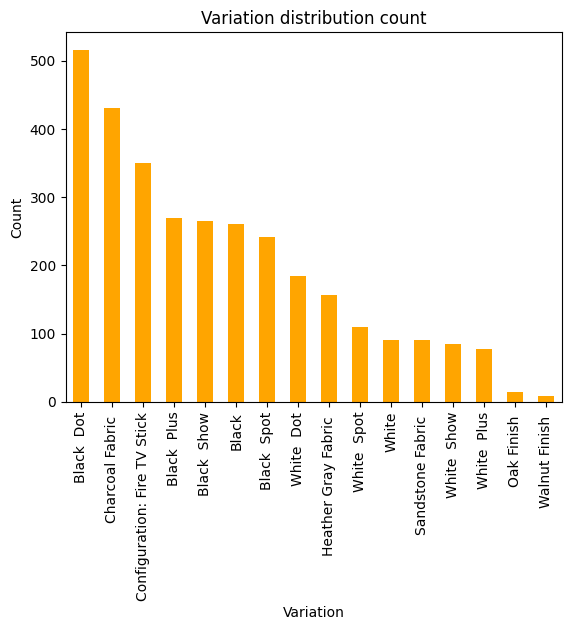

In [55]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [56]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


In [59]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

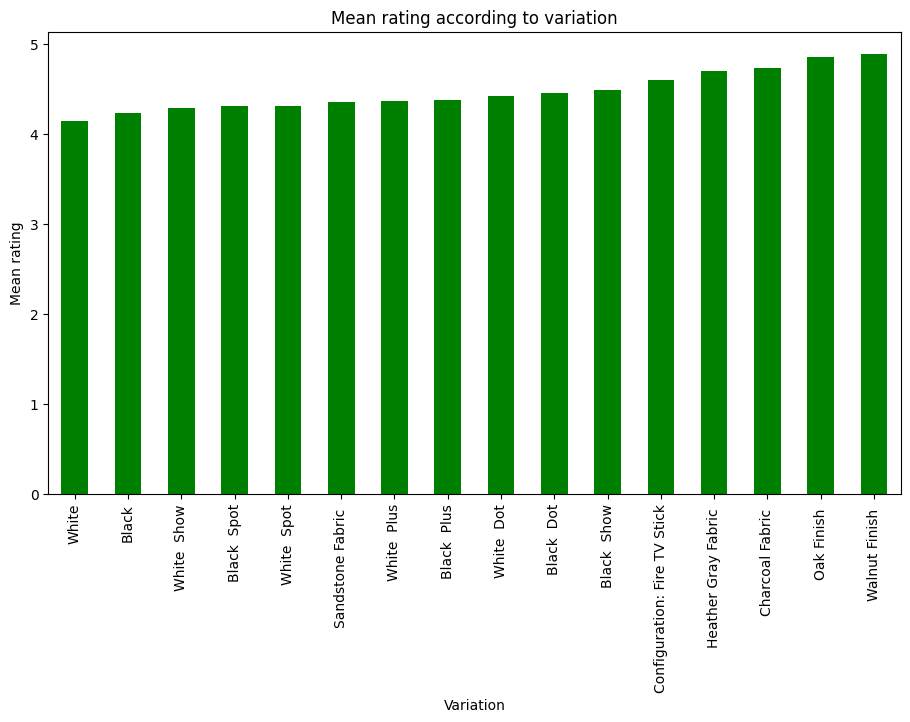

In [61]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'green', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

### Analyzing 'verified_reviews' column
This column contains the textual review given by the user for a variation for the product.

In [62]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

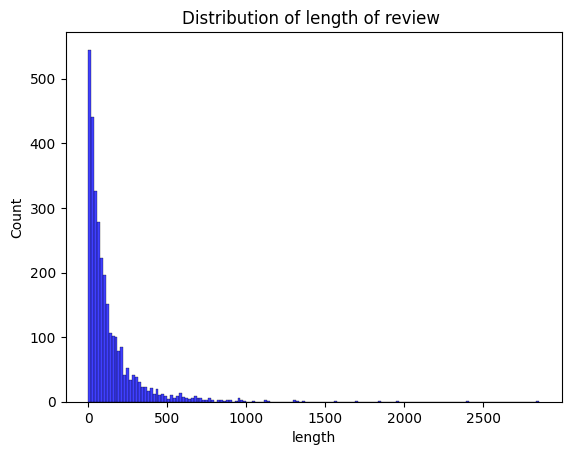

In [63]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

In [67]:
data[data.length==10]

,rating,date,variation,verified_reviews,feedback,length
73,4,30-Jul-18,Sandstone Fabric,Setting up,1,10
170,5,30-Jul-18,Charcoal Fabric,Good Value,1,10
189,5,29-Jul-18,Charcoal Fabric,Everything,1,10
196,5,29-Jul-18,Sandstone Fabric,I love it!,1,10
235,5,29-Jul-18,Heather Gray Fabric,Liked 100%,1,10
448,5,5-Jul-18,Black,Works good,1,10
479,5,27-Jun-18,Black,of course!,1,10
502,5,24-Jun-18,Black,Thumbs up!,1,10
669,5,23-May-18,Black,I love it!,1,10
768,4,30-Jul-18,Sandstone Fabric,Setting up,1,10


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

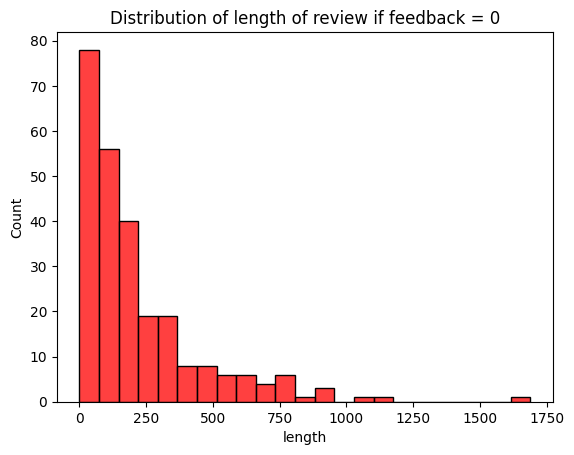

In [68]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

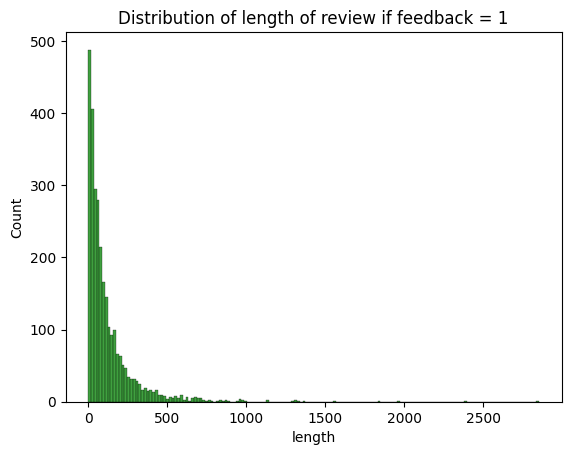

In [69]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')


[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

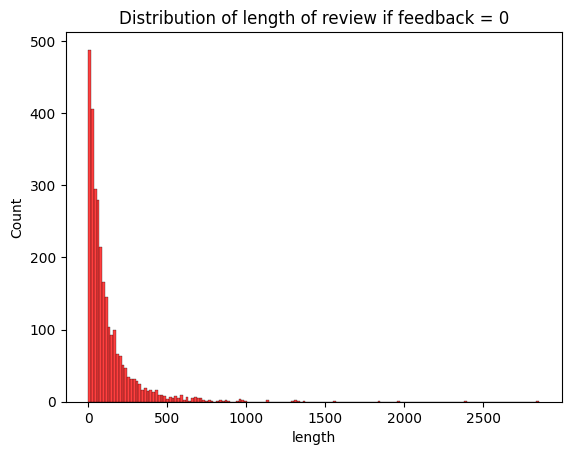

In [71]:
sns.histplot(data[data['feedback']==1]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

Lengthwise mean rating

In [72]:
data.groupby('length')['rating'].mean()

length
1       3.716049
2       5.000000
3       4.000000
4       4.600000
5       4.823529
          ...   
1688    2.000000
1835    3.000000
1956    3.000000
2395    5.000000
2853    5.000000
Name: rating, Length: 495, dtype: float64

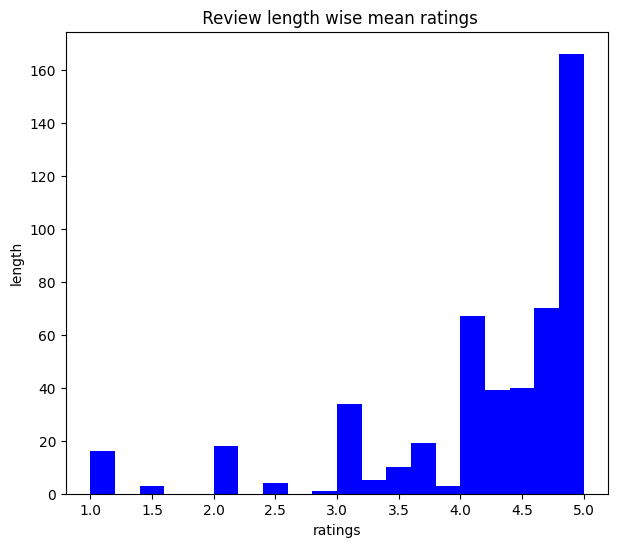

In [73]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

In [78]:
cv.vocabulary_

{'love': 2029,
 'echo': 1095,
 'loved': 2030,
 'playing': 2471,
 'game': 1413,
 'answer': 236,
 'question': 2623,
 'correctly': 796,
 'alexa': 190,
 'says': 2885,
 'got': 1473,
 'wrong': 3752,
 'answers': 239,
 'like': 1955,
 'able': 79,
 'turn': 3497,
 'lights': 1954,
 'away': 337,
 'home': 1616,
 'lot': 2023,
 'fun': 1395,
 'thing': 3386,
 'yr': 3775,
 'old': 2289,
 'learns': 1927,
 'dinosaurs': 980,
 'control': 770,
 'play': 2468,
 'games': 1414,
 'categories': 564,
 'nice': 2230,
 'sound': 3115,
 'music': 2183,
 'received': 2681,
 'gift': 1444,
 'needed': 2210,
 'bluetooth': 436,
 'easily': 1091,
 'accessible': 89,
 'smart': 3061,
 'speaker': 3136,
 'wait': 3643,
 'having': 1558,
 'cellphone': 575,
 'use': 3576,
 'features': 1300,
 'ipad': 1804,
 'great': 1495,
 'alarm': 183,
 'deaf': 881,
 'hear': 1571,
 'bedroom': 385,
 'living': 1983,
 'room': 2842,
 'reason': 2670,
 'ask': 288,
 'random': 2642,
 'questions': 2625,
 'response': 2807,
 'does': 1037,
 'smartbon': 3062,
 'politics'

In [88]:
len(words[0].toarray()[0])

3784

In [90]:
from wordcloud import WordCloud

In [92]:
reviews

'Love my Echo! Loved it! "Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home." "I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well." Music "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do." "Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet." I think this is the 5th one I\'ve purchased. I\'m wor

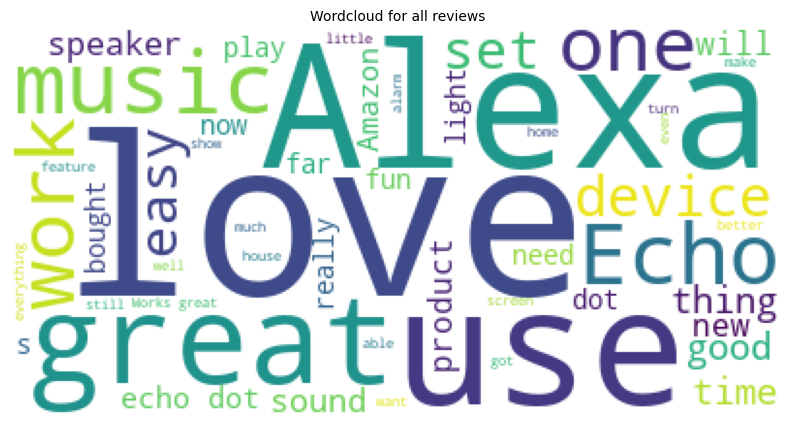

In [91]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

Lets find the unique words in each feedback category

In [99]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

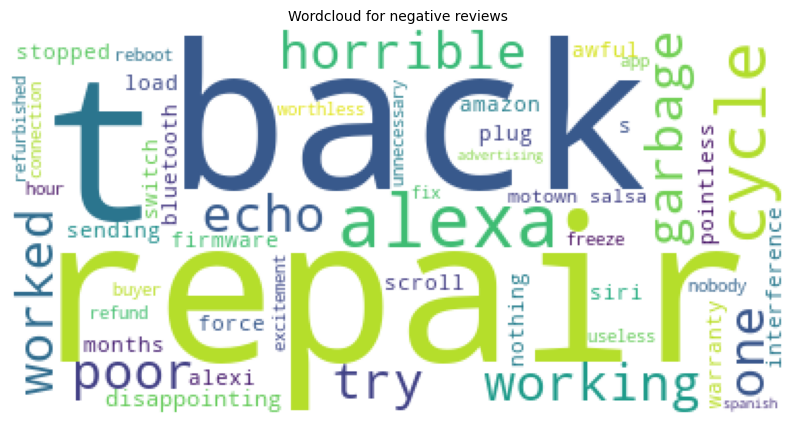

In [100]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

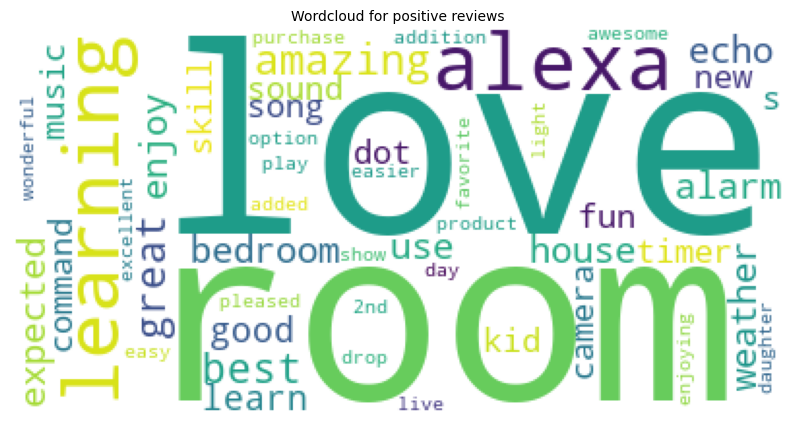

In [102]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

Positive words can be seen in the above word cloud - love, enjoying, amazing, best, great,good etc

## Preprocessing and Modelling
To build the corpus from the 'verified_reviews' we perform the following -

- Replace any non alphabet characters with a space
- Covert to lower case and split into words
- Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [107]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import re

In [109]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

Using Count Vectorizer to create bag of words

In [110]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [173]:
#Saving the Count Vectorizer
pickle.dump(cv, open('E:/NLP Poject/countVectorizer.pkl', 'wb'))

In [111]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)


In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [121]:
import pickle

In [122]:
#Saving the scaler model
pickle.dump(scaler, open('E:/NLP Poject/scaler.pkl', 'wb'))

### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [126]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9407407407407408


In [170]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [171]:
x=accuracy_score(y_preds,y_test)
print(x)

0.9407407407407408


In [163]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report


In [134]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[ 25,  50],
       [  6, 864]], dtype=int64)

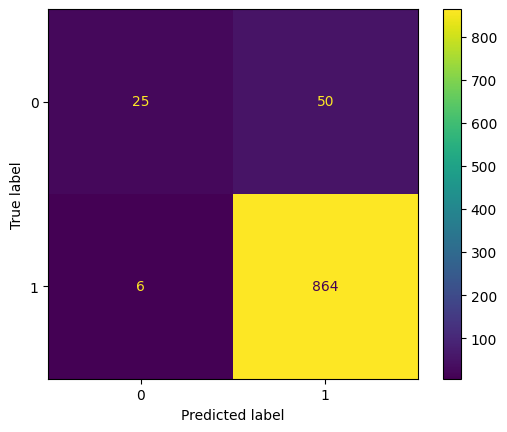

In [135]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [144]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV


In [141]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9360571781160015
Standard Variance : 0.01077903346350434


 Applying grid search to get the optimal parameters on random forest

In [149]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [150]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [151]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [154]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.95604649421723
Cross validation mean accuracy on test set : 92.29013472578498
Accuracy score for test set : 0.9407407407407408


In [156]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Classifier

In [157]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [158]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9153439153439153


In [169]:
y_preds = model_dt.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [167]:
x=accuracy_score(y_preds,y_test)
print(x)

0.8941798941798942


In [160]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 32  43]
 [ 57 813]]


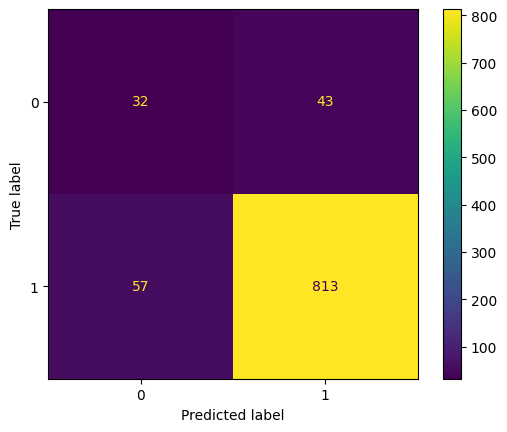

In [161]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

Rnadom Forest having high acc. then decision tree

In [172]:
#Saving the XGBoost classifier
pickle.dump(model_rf, open('E:/NLP Poject/model_RF.pkl', 'wb'))